In [1]:
%matplotlib inline
import pylab
import nengo
import numpy as np

In [21]:
model = nengo.Network()
with model:
    stim = nengo.Node(lambda t: np.sin(t*np.pi*2))
    a = nengo.Ensemble(100, 1)
    b = nengo.Ensemble(100, 1)
    
    nengo.Connection(stim, a)
    nengo.Connection(a, b, solver=nengo.solvers.Nnls(weights=True))
    
    p = nengo.Probe(b, synapse=0.03)
    p_stim = nengo.Probe(stim, synapse=0.03)
    
    

In [22]:
sim = nengo.Simulator(model)
sim.run(2)

BuildError: shape mismatch in <Connection from <Ensemble (unlabeled) at 0x7fda44dc74d0> to <Ensemble (unlabeled) at 0x7fda44edd610>>.weights_elementwiseinc: (1, 100) x (100,) -> (100,)

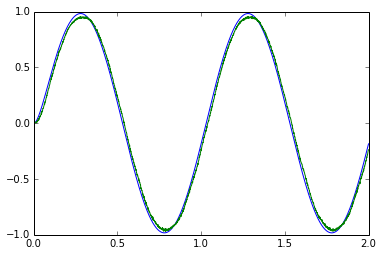

In [15]:
pylab.plot(sim.trange(), sim.data[p_stim])
pylab.plot(sim.trange(), sim.data[p])
pylab.show()